[View in Colaboratory](https://colab.research.google.com/github/ndkshr/100DaysOfMLCode/blob/master/Deeplearning_with_python_Simple_MNIST_data.ipynb)

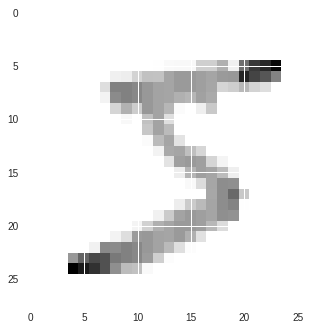

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()

#feature normalization : all the pixels ranging from 0 - 255 are normalized to the range 0 - 1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#the Neural Network is designed sequentially adding one layer after another
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # the input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #first hidden layer uses relu activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #second hidden layer uses relu activation function
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #output layer of the neural network uses a softmax for activation

#The optimizer is basically the cost function calculation, we use the Adam optimizer for optimizing the cost
#The loss function is a sparse categorical cross entropy function
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#The model is trained using the created Neural Network and the training data set, the entire data set is divided into 3 epochs
#The model does forward and backpropogation on its own
model.fit(x_train, y_train, epochs = 3)

In [0]:
#The loss and acuracy of the model is evaluated
#Loss is the change in hypothesis and the original label in the data set.
#The objective is to:
#                     Minimize the loss
#                     Maximize the accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Loss:', val_loss,
      '\nAccuracy:', val_acc)

In [0]:
#The model is tested on the test data and the output is saved in the predictions matrix
#The prediction matrix outputs a 10 (one for each no from 1-10) element long list
#The index with the maximum value is the victor and hence the model's prediction
predictions = model.predict([x_test])

In [49]:
print('The shape of the prediction matrix \n(#size_of_the_test_data, #size_of_the_output_layer) ->', predictions.shape)

The shape of the prediction matrix 
(#size_of_the_test_data, #size_of_the_output_layer) -> (10000, 10)


Predictions for the 1107 th image is -> 9
Original Label -> 9


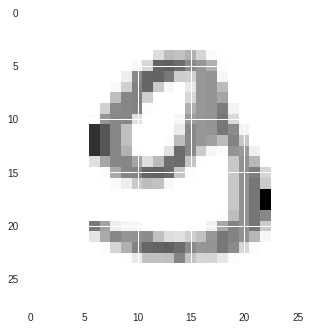

In [80]:
#Show the prediction with the max value in the output of the predictions list in the data Row
import numpy as np
image_index = int(np.random.randn()*1000)

print("Predictions for the %d th image is ->"%(image_index), np.argmax(predictions[image_index]))
print('Original Label ->', y_test[image_index])
plt.imshow(x_test[image_index])
plt.show()